In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Plot Training Progress

## Generate data

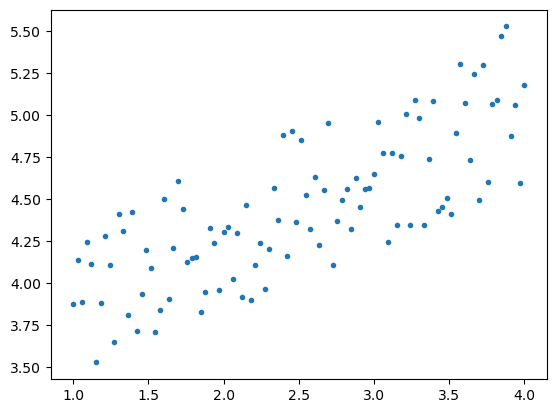

In [3]:
a = 0.4
b = 3

x = np.linspace(1, 4, 100)
noise = np.random.rand(len(x))
y = a * x + b + noise

plt.plot(x, y, '.')
plt.show()

## Create model

In [4]:
one_layer_nn = Sequential([
    Input(shape= (1,)),
    Dense(units=1),
])

In [5]:
one_layer_nn.compile(loss='mean_squared_error', optimizer='sgd')

## Plot predictions on epoch end

In [6]:
def plot_prediction(*args):
    weights = one_layer_nn.layers[0].get_weights()
    a = weights[0][0]
    b = weights[1]
    y_pred = a * x + b
    plt.figure(figsize=(3,2))
    plt.plot(x, y, '.')
    plt.plot(x, y_pred, '-')
    plt.axis('off')
    plt.show()

plot_prediction_callback = LambdaCallback(on_epoch_end=plot_prediction)

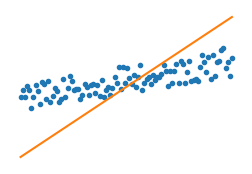

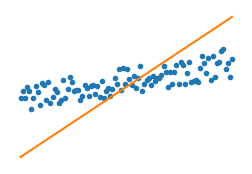

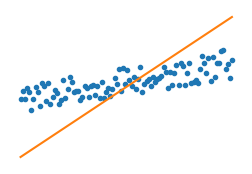

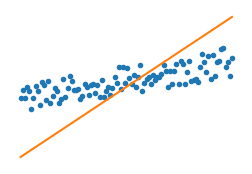

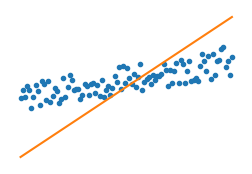

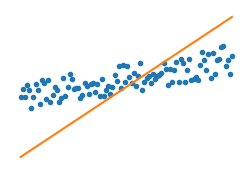

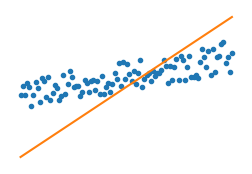

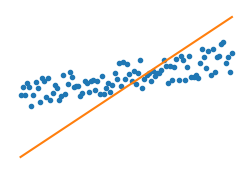

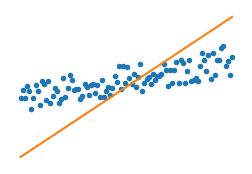

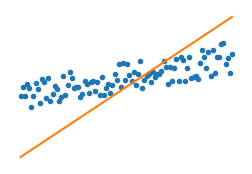

In [8]:
one_layer_nn.fit(x, y, epochs=10, verbose=0, callbacks=[plot_prediction_callback])